In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage
import math
from sklearn.metrics import accuracy_score

In [4]:
X, y = make_blobs(n_samples=30, centers=2, random_state=42, cluster_std=0.5)

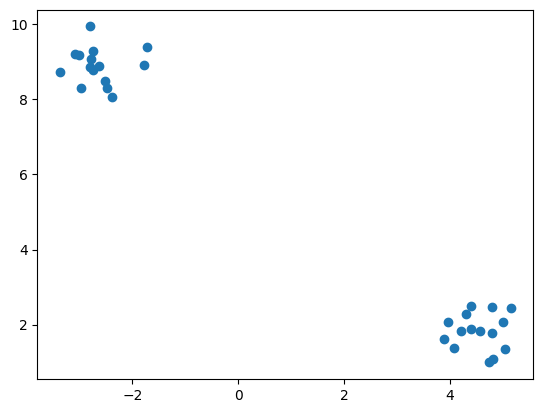

In [5]:
plt.scatter(X[:, 0], X[:, 1])

In [6]:
def update_cluster_centers(X, c):
    centers = np.zeros((2, 2))
    for i in range(1, 3):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

In [7]:
mergings = linkage(X, method='ward')
T = fcluster(mergings, 2, criterion='maxclust')
clusters = update_cluster_centers(X, T)
clusters

array([[ 4.55038539,  1.83660939],
       [-2.6548538 ,  8.89346858]])

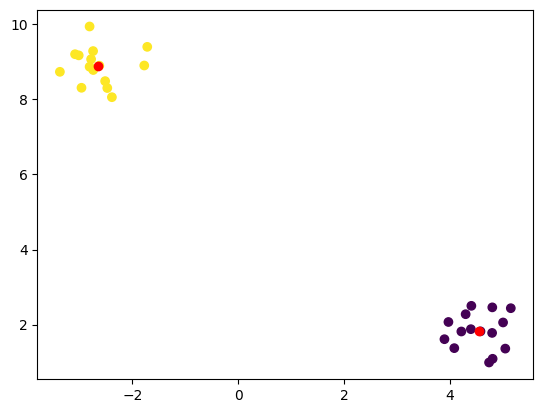

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.scatter(clusters[:, 0], clusters[:, 1], c='red')

In [10]:
class SOM:
    def __init__(self, n, c):

        self.n = n
        self.c = c
        self.a = [0 for _ in range(n)]

    def calculate_a(self, i):

        return (50 - i) / 100

    def winner(self, weights, sample):
 
        d0 = 0
        d1 = 0
        for i in range(len(sample)):
            d0 += math.pow((sample[i] - weights[0][i]), 2)
            d1 += math.pow((sample[i] - weights[1][i]), 2)

        if d0 > d1:
            return 0
        else:
            return 1

    def update(self, weights, sample, j):

        for i in range(len(weights)):
            weights[j][i] = weights[j][i] + 0.5 * (sample[i] - weights[j][i])

        print(f'\nШаг {j} кластера = {self.calculate_a(self.a[j])}')
        self.a[j] += 1
        print(f'Веса:')
        print(weights)

        return weights

In [11]:
np.random.shuffle(X)
T = X
m, n = len(T), len(T[0])

C = 2

weights = np.random.normal(100, 10, size=(n, C)) / 100
weights

array([[0.96591768, 1.06872956],
       [1.12855089, 1.17284075]])

In [12]:
som = SOM(n, C)
som

In [13]:
for j in range(100):
    for i in range(m):
        sample = T[i]
        J = som.winner(weights, sample)
        weights = som.update(weights, sample, J)


Шаг 0 кластера = 0.5
Веса:
[[2.88391925 1.42467905]
 [1.12855089 1.17284075]]

Шаг 0 кластера = 0.49
Веса:
[[0.05126513 5.24721324]
 [1.12855089 1.17284075]]

Шаг 1 кластера = 0.5
Веса:
[[ 0.05126513  5.24721324]
 [-0.32391117  5.03711936]]

Шаг 0 кластера = 0.48
Веса:
[[-1.51671464  7.22467419]
 [-0.32391117  5.03711936]]

Шаг 0 кластера = 0.47
Веса:
[[ 1.64439796  4.84280822]
 [-0.32391117  5.03711936]]

Шаг 1 кластера = 0.49
Веса:
[[1.64439796 4.84280822]
 [2.21019973 3.01522699]]

Шаг 0 кластера = 0.46
Веса:
[[3.11322633 3.33271303]
 [2.21019973 3.01522699]]

Шаг 1 кластера = 0.48
Веса:
[[3.11322633 3.33271303]
 [3.30987959 2.75847889]]

Шаг 1 кластера = 0.47
Веса:
[[3.11322633 3.33271303]
 [0.28297239 6.02202252]]

Шаг 1 кластера = 0.46
Веса:
[[3.11322633 3.33271303]
 [2.54733018 3.55683606]]

Шаг 1 кластера = 0.45
Веса:
[[3.11322633 3.33271303]
 [3.31702077 2.46595122]]

Шаг 1 кластера = 0.44
Веса:
[[3.11322633 3.33271303]
 [0.46440214 5.26179861]]

Шаг 0 кластера = 0.45
Веса:
[

[[-1.63640096  7.84154833]
 [-0.95034008  7.34402285]]

Шаг 0 кластера = -5.77
Веса:
[[ 1.5845548   5.15124529]
 [-0.95034008  7.34402285]]

Шаг 1 кластера = -4.97
Веса:
[[1.5845548  5.15124529]
 [1.89698528 4.16867873]]

Шаг 0 кластера = -5.78
Веса:
[[3.08330475 3.48693156]
 [1.89698528 4.16867873]]

Шаг 1 кластера = -4.98
Веса:
[[3.08330475 3.48693156]
 [3.15327236 3.33520477]]

Шаг 1 кластера = -4.99
Веса:
[[3.08330475 3.48693156]
 [0.20466877 6.31038546]]

Шаг 1 кластера = -5.0
Веса:
[[3.08330475 3.48693156]
 [2.50817838 3.70101753]]

Шаг 1 кластера = -5.01
Веса:
[[3.08330475 3.48693156]
 [3.29744486 2.53804195]]

Шаг 1 кластера = -5.02
Веса:
[[3.08330475 3.48693156]
 [0.45461419 5.29784398]]

Шаг 0 кластера = -5.79
Веса:
[[0.30393561 5.8944218 ]
 [0.45461419 5.29784398]]

Шаг 1 кластера = -5.03
Веса:
[[ 0.30393561  5.8944218 ]
 [-1.03066602  6.89163732]]

Шаг 1 кластера = -5.04
Веса:
[[0.30393561 5.8944218 ]
 [2.06235629 4.66522353]]

Шаг 0 кластера = -5.8
Веса:
[[2.30267672 4.086

Веса:
[[-1.55921236  8.24310567]
 [-1.4827747   7.81027002]]

Шаг 0 кластера = -11.13
Веса:
[[ 1.20828672  5.15735299]
 [-1.4827747   7.81027002]]

Шаг 0 кластера = -11.14
Веса:
[[-0.25565225  7.27767824]
 [-1.4827747   7.81027002]]

Шаг 1 кластера = -9.69
Веса:
[[-0.25565225  7.27767824]
 [ 1.20892157  4.7117588 ]]

Шаг 0 кластера = -11.15
Веса:
[[2.37672994 4.66826603]
 [1.20892157 4.7117588 ]]

Шаг 1 кластера = -9.7
Веса:
[[2.37672994 4.66826603]
 [2.71459582 3.26516115]]

Шаг 0 кластера = -11.16
Веса:
[[3.38851083 3.27430311]
 [2.71459582 3.26516115]]

Шаг 0 кластера = -11.17
Веса:
[[0.00842714 6.00372274]
 [2.71459582 3.26516115]]

Шаг 1 кластера = -9.71
Веса:
[[ 0.00842714  6.00372274]
 [-0.12430692  5.78664771]]

Шаг 0 кластера = -11.18
Веса:
[[ 2.40517398  3.89217564]
 [-0.12430692  5.78664771]]

Шаг 0 кластера = -11.19
Веса:
[[-0.1881075   6.48096153]
 [-0.12430692  5.78664771]]

Шаг 1 кластера = -9.72
Веса:
[[-0.1881075   6.48096153]
 [-0.95034008  7.34402285]]

Шаг 0 кластер

In [18]:
s = X[0]
J = som.winner(weights, s)

#print(f"Элемент принадлежит к {J} кластеру, на самом деле к {y[0]} кластеру")
print("Обученные веса: ")
print(weights)

Обученные веса: 
[[ 0.00842714  6.00372274]
 [-0.12430692  5.78664771]]


In [15]:
predicted = np.array([som.winner(weights, s) for s in X])
predicted

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1])

In [16]:
y == predicted

array([ True,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False, False])

In [17]:
print(f'Точность кластеризации: {accuracy_score(y, predicted) * 100}%')

Точность кластеризации: 46.666666666666664%
